In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_goiania.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_manaus.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_sao_luiz.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_belem.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_curitiba.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_salvador.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_sao_paulo.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_macapa.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_rio.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_vitoria.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_recife.csv
/kaggle/input/temperature-timeseries-for-some-brazilian-cities/station_fortaleza.csv


# 1-) Leitura dos Dados

In [2]:
# Leitura dos dados de uma cidade brasileira: Recife
df = pd.read_csv("../input/temperature-timeseries-for-some-brazilian-cities/station_recife.csv")
print(f"Shape:{df.shape}")
df

Shape:(78, 18)


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1942,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,25.23,999.90,999.90,999.90,999.90,999.90
1,1943,25.73,25.73,26.03,24.83,24.03,23.23,22.33,22.53,23.43,24.73,25.13,25.52,25.56,24.96,22.70,24.43,24.41
2,1944,25.62,25.92,26.22,25.02,24.12,23.42,22.62,21.92,22.82,24.32,25.42,26.02,25.69,25.12,22.65,24.19,24.41
3,1945,26.52,25.52,26.52,25.82,24.32,22.72,22.32,23.02,23.82,24.52,25.52,25.41,26.02,25.55,22.69,24.62,24.72
4,1946,25.51,26.41,25.81,24.61,24.51,23.41,23.41,23.41,23.61,24.41,24.81,25.30,25.78,24.98,23.41,24.28,24.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2015,26.75,27.45,26.65,27.00,26.45,25.30,24.80,24.75,25.70,26.35,27.05,27.40,27.00,26.70,24.95,26.37,26.25
74,2016,27.65,27.65,27.65,27.20,26.05,25.10,24.65,24.75,25.75,26.85,27.55,27.35,27.57,26.97,24.83,26.72,26.52
75,2017,27.60,28.05,27.50,26.80,26.20,25.35,24.30,24.30,25.00,25.95,26.95,27.60,27.67,26.83,24.65,25.97,26.28
76,2018,27.10,27.15,27.15,26.15,25.85,24.75,24.10,24.40,25.00,26.50,27.25,27.20,27.28,26.38,24.42,26.25,26.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    78 non-null     int64  
 1   JAN     78 non-null     float64
 2   FEB     78 non-null     float64
 3   MAR     78 non-null     float64
 4   APR     78 non-null     float64
 5   MAY     78 non-null     float64
 6   JUN     78 non-null     float64
 7   JUL     78 non-null     float64
 8   AUG     78 non-null     float64
 9   SEP     78 non-null     float64
 10  OCT     78 non-null     float64
 11  NOV     78 non-null     float64
 12  DEC     78 non-null     float64
 13  D-J-F   78 non-null     float64
 14  M-A-M   78 non-null     float64
 15  J-J-A   78 non-null     float64
 16  S-O-N   78 non-null     float64
 17  metANN  78 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 11.1 KB


# 2-) Tratativa dos dados

In [4]:
def make_ts(df):
    temperature_ts_df = pd.melt(df, id_vars=['YEAR'], value_vars=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"])
    temperature_ts_df['DATE'] = temperature_ts_df.YEAR.astype(str) +"-"+ temperature_ts_df.variable
    temperature_ts_df['DATE'] = pd.to_datetime(temperature_ts_df['DATE'],format="%Y-%b")
    temperature_ts_df.drop(columns=['YEAR','variable'],inplace=True)
    temperature_ts_df.set_index('DATE',drop=True,inplace=True)
    temperature_ts_df.rename(columns = {'value':'Temperature'},inplace=True)
    temperature_ts_df.sort_values(by='DATE',inplace=True)
    return temperature_ts_df
temperature_ts_df = make_ts(df)
temperature_ts_df

,Temperature
DATE,
1942-01-01,999.90
1942-02-01,999.90
1942-03-01,999.90
1942-04-01,999.90
1942-05-01,999.90
...,...
2019-08-01,23.75
2019-09-01,24.65
2019-10-01,25.40


Insight: Muitos valores absurdos, provável falta de dados ou erro no equipamento de medição.

In [5]:
temperature_ts_df[temperature_ts_df>55] = None
temperature_ts_df.isna().sum()

Temperature    75
dtype: int64

* Todo valor extremo (acima de 55) é colocado cono NaN
* Existem 75 valores extremos no dataset

# 3-) EDA

In [6]:
temperature_ts_df.describe()

,Temperature
count,861.000000
mean,25.500662
std,1.214372
min,21.920000
25%,24.680000
50%,25.550000
75%,26.450000
max,28.570000


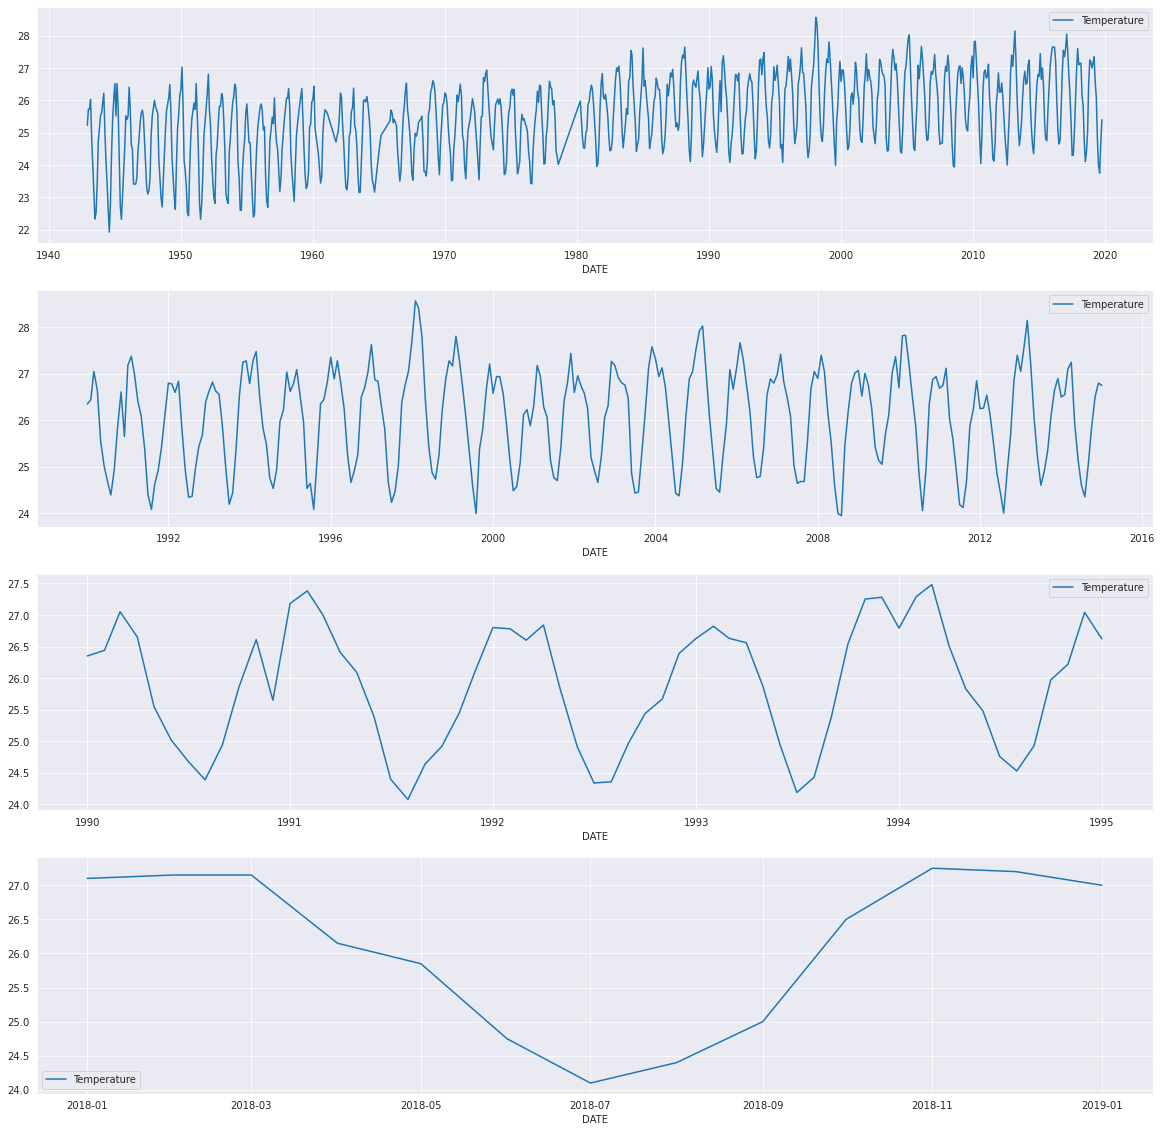

In [7]:
# Plot das series temporais nos periodos: Completo, 25 anos, 5 anos, 1 ano

fig,ax = plt.subplots(4,1,figsize=(20,20))
sns.lineplot(data = temperature_ts_df,ax=ax[0])
sns.lineplot(data = temperature_ts_df["1990-01-01":"2015-01-01"],ax=ax[1])
sns.lineplot(data = temperature_ts_df["1990-01-01":"1995-01-01"],ax=ax[2])
sns.lineplot(data = temperature_ts_df["2018-01-01":"2019-01-01"],ax=ax[3])
plt.show()

Insights:
* Visualmente os dados não apresentam tendência, sendo estacionários.
* Sazonalidade visual em 1 ano.

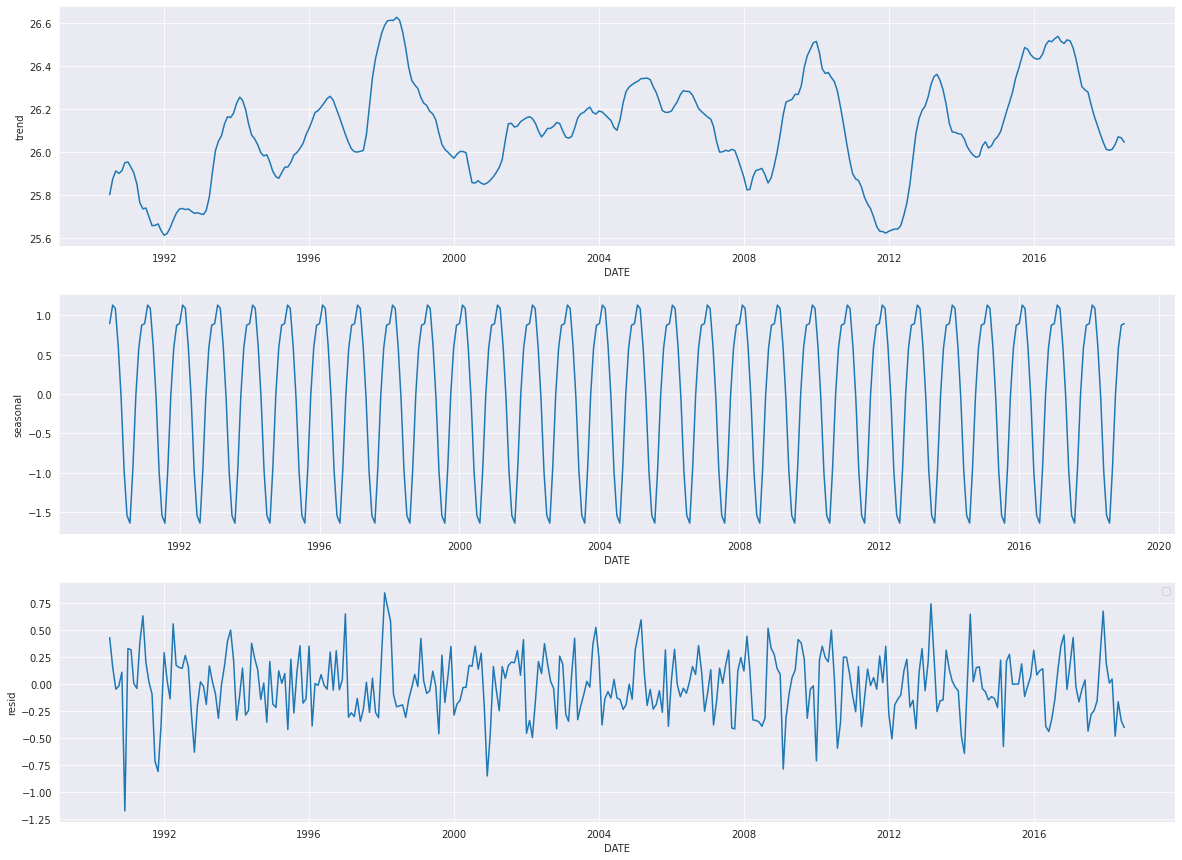

In [8]:
# Decomposição da serie de 1990 em diante

result = seasonal_decompose(temperature_ts_df["1990-01-01":"2019-01-01"])

fig,ax = plt.subplots(3,1,figsize=(20,15))

sns.lineplot(data = result.trend,ax=ax[0],legend="brief")
sns.lineplot(data = result.seasonal,ax=ax[1],legend="brief")
sns.lineplot(data = result.resid,ax=ax[2],legend="brief")
plt.legend()
plt.show()

Insights:
* Confirmação da estacionariedade da serie, e do componente anual de sazonalidade.
* Residuo pouco presente, baixo ruído.

In [9]:
temperature_ts_df

,Temperature
DATE,
1942-01-01,NaN
1942-02-01,NaN
1942-03-01,NaN
1942-04-01,NaN
1942-05-01,NaN
...,...
2019-08-01,23.75
2019-09-01,24.65
2019-10-01,25.40


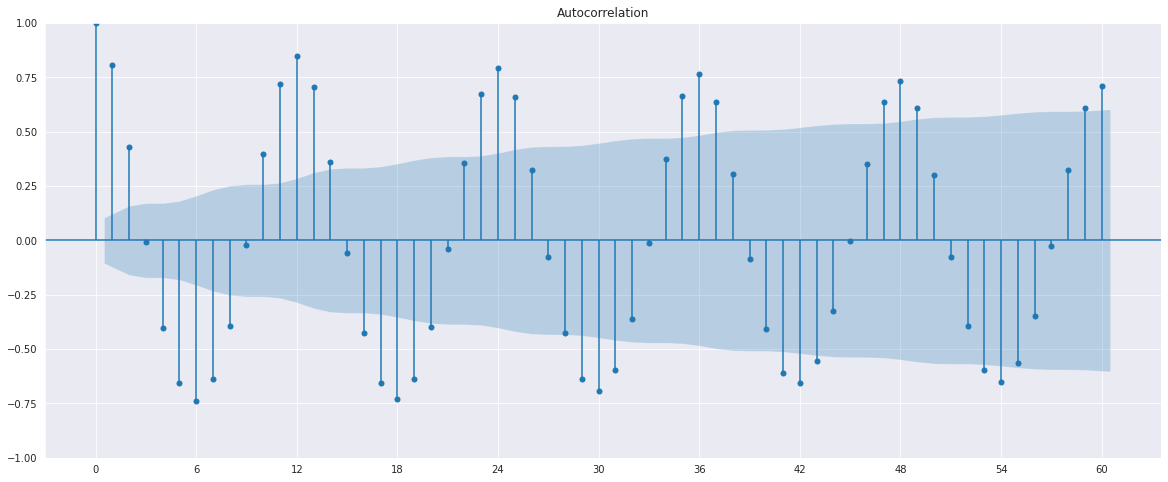

In [10]:
fig,ax = plt.subplots(figsize=(20,8))
plot_acf(temperature_ts_df["1990-01-01":"2019-01-01"], lags=60, ax=ax)
ax.set_xticks(np.arange(0,61,6))
fig.show()

Insights:
* Alta correlação em 1 ano.
* Correlação negativa para 6 meses, inversão da temperatura nesse periodo. Como Recife tem apenas verão e inverno bem definido, esse periodo de 6 meses é justamente a mudança entre tais periodos.

<AxesSubplot:xlabel='DATE'>

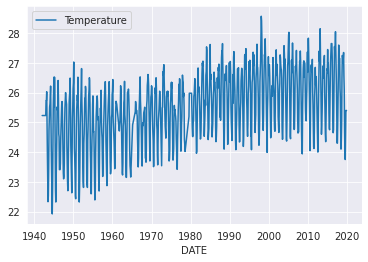

In [11]:
temperature_ts_df.interpolate(method="linear",limit=12,inplace=True)
temperature_ts_df.fillna(method="backfill",inplace=True)
sns.lineplot(data = temperature_ts_df)

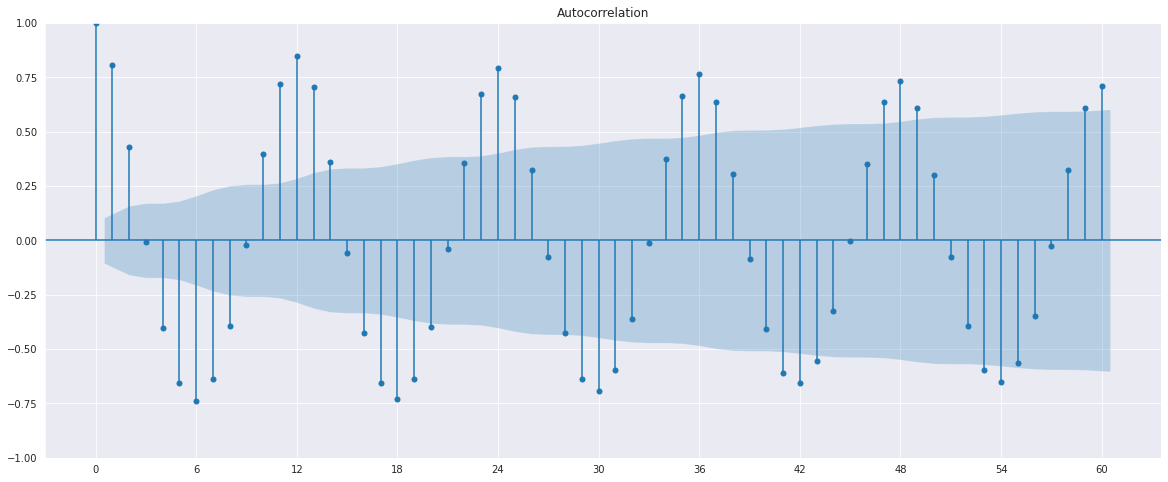

In [12]:
# Análise da decomposição depois do tratamento
fig,ax = plt.subplots(figsize=(20,8))
plot_acf(temperature_ts_df["1990-01-01":"2019-01-01"], lags=60, ax=ax)
ax.set_xticks(np.arange(0,61,6))
fig.show()

Insights: Permaneceu com mesma autocorrelação, o tratamento não influenciou.

# 4-) Engenharia de Variável

In [13]:
# Função para gerar os lags na timeseries
# Criando as variaveis com delay
def make_lags(df,list_features,n_lags):
  col_features=[]
  for n in n_lags:
      for f in list_features:
          name_feature = f+"_lag"+str(n) 
          df[name_feature] = df[f].shift(n)
          col_features.append(name_feature)
  return df[col_features]

In [14]:
vars_df = temperature_ts_df.copy()

vars_df = make_lags(temperature_ts_df,['Temperature'],[1,6,12])
vars_df['Temp'] = temperature_ts_df['Temperature']
vars_df

,Temperature_lag1,Temperature_lag6,Temperature_lag12,Temp
DATE,,,,
1942-01-01,NaN,NaN,NaN,25.23
1942-02-01,25.23,NaN,NaN,25.23
1942-03-01,25.23,NaN,NaN,25.23
1942-04-01,25.23,NaN,NaN,25.23
1942-05-01,25.23,NaN,NaN,25.23
...,...,...,...,...
2019-08-01,24.00,27.15,24.40,23.75
2019-09-01,23.75,27.35,25.00,24.65
2019-10-01,24.65,26.55,26.50,25.40


In [15]:
#Tratamento final (Retrada dos NaN)
vars_df.dropna(inplace=True)

# 5-) Modelos

In [16]:
X = vars_df.iloc[:,:-1].values
y = vars_df.iloc[:,-1].values

print(f'X shape:{X.shape}')
print(f'y shape:{y.shape}')

X shape:(924, 3)
y shape:(924,)


In [17]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X val shape: {X_val.shape}')
print(f'y val shape: {y_val.shape}')

X train shape: (693, 3)
y train shape: (693,)
X val shape: (231, 3)
y val shape: (231,)


In [18]:
feature_scaler = StandardScaler()
feature_scaler.fit(X_train)
X_train = feature_scaler.transform(X_train)
X_val = feature_scaler.transform(X_val)

target_scaler = StandardScaler()
target_scaler.fit(y_train.reshape(-1, 1))
y_train = target_scaler.transform(y_train.reshape(-1, 1))
y_val = target_scaler.transform(y_val.reshape(-1, 1))

5.1-) FFNN

In [19]:
FFNN = MLPRegressor()
ffnn_params = {'hidden_layer_sizes':np.arange(20,150,10),
               'learning_rate_init':np.arange(0.001,0.8,0.05)}

ffnn_regressor = GridSearchCV(FFNN,ffnn_params)
ffnn_regressor.fit(X_train,y_train.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'hidden_layer_sizes': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140]),
                         'learning_rate_init': array([0.001, 0.051, 0.101, 0.151, 0.201, 0.251, 0.301, 0.351, 0.401,
       0.451, 0.501, 0.551, 0.601, 0.651, 0.701, 0.751])})

In [20]:
FFNN = ffnn_regressor.best_estimator_
FFNN.fit(X_train,y_train.ravel())

print(f'Score para o dataset de treino:{FFNN.score(X_train,y_train):.3f}')
print(f'Score para o dataset de validação:{FFNN.score(X_val,y_val):.3f}')

Score para o dataset de treino:0.878
Score para o dataset de validação:0.825
